In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import os
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
infile = open('/content/drive/MyDrive/x_test_file','rb')
X_test = pickle.load(infile)
infile.close()

In [4]:
img_size = 224
X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)

In [5]:
infile = open('/content/drive/MyDrive/y_test_file','rb')
y_test = pickle.load(infile)
infile.close()

Y_test = np.array(y_test)

In [6]:
import tensorflow as tf

In [7]:
model = tf.keras.models.load_model('/content/drive/MyDrive/transfer_model.h5')

In [ ]:
model.evaluate(X_test[:500], Y_test[:500])

16/16 [==============================] - 12s 718ms/step - loss: 3.0308 - accuracy: 0.4920


[3.030806064605713, 0.492000013589859]

In [8]:
model.evaluate(X_test[:600], Y_test[:600])

19/19 [==============================] - 17s 828ms/step - loss: 3.0076 - accuracy: 0.4950


[3.0076096057891846, 0.4950000047683716]

In [9]:
model.evaluate(X_test[:1200], Y_test[:1200])

38/38 [==============================] - 32s 829ms/step - loss: 3.0165 - accuracy: 0.4667


[3.0165188312530518, 0.46666666865348816]

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
frame = cv2.imread('/content/drive/MyDrive/HAPPY1.jpg')

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in faces:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = frame[y:y+h, x:x+w]
  cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
  facess = faceCascade.detectMultiScale(roi_gray)
  if len(faces) == 0:
    print("face not detected")
  else:
    for (ex, ey, ew, eh) in facess:
      face_roi = roi_color[ey: ey+eh, ex:ex + ew]

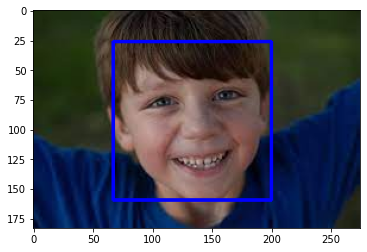

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
final_image = cv2.resize(face_roi, (224, 224))
final_image = np.expand_dims(final_image, axis = 0)
Predictions = model.predict(final_image)
np.argmax(Predictions)

3